In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def draw_arc(x, y, r, phi1, phi2, axs, **kwargs):
    
    theta = np.arctan2(y, x) + np.pi
    phi = np.linspace(theta - phi1, theta + phi2, 1000)
    plt.plot(x + r * np.cos(phi), y + r * np.sin(phi), **kwargs)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    return theta

def draw_line(x0, y0, theta, axs, **kwargs):
    x = np.linspace(-5, 5, 1000)
    plt.plot(x0 + x * np.cos(theta), y0 + x * np.sin(theta))
    
def draw_circle(x, y, r, axs, **kwargs):
    draw_arc(x, y, r, 0, 2*np.pi, axs, **kwargs)
    
def draw(xx, yy, rr, pphi):
    
    fig, axs = plt.subplots(figsize=(10, 10))
    axs.set_xlim(-2.5, 2.5)
    axs.set_ylim(-2.5, 2.5)
    for x, y, r, phi in zip(xx, yy, rr, pphi):
        draw_circle(x, y, r, axs, linewidth=3, color='k', alpha=0.3)
        for p1, p2 in phi:
            draw_arc(x, y, r, p1, p2, axs, linewidth=3, color='r', alpha=1)
    return axs

In [5]:
def caseII1(xp, yp, rp, xm, ym, rm, axs):
    brp2 = (xp - xm)**2 + (yp - ym)**2
    brp = np.sqrt(brp2)
    bp = np.sqrt(xp**2 + yp**2)
    bm = np.sqrt(xm**2 + ym**2)
    
    phi_mp = np.arccos((brp2 + rm**2 - rp**2) / (2 * brp * rm))
    phi = np.pi + np.arctan2(ym, xm)
    theta = np.arctan2((yp - ym), (xp - xm))
    dtheta = phi - theta
    dphi = phi_mp
    phi1 = dtheta - dphi
    phi2 = 2 * np.pi - dphi - dtheta
    
    return phi1, phi2

0.14189705460416402

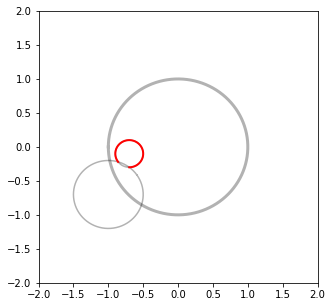

In [6]:
fig, axs = plt.subplots(figsize=(5, 5))

xp, yp, rp = -1, -0.7, 0.5
xm, ym, rm = -0.7, -0.1, 0.2

draw_circle(0, 0, 1, axs, color='k', alpha=0.3, linewidth=3)
draw_circle(xp, yp, rp, axs, color='k', alpha=0.3)
draw_circle(xm, ym, rm, axs, color='k', alpha=0.3)

phi1, phi2 = caseII1(xp, yp, rp, xm, ym, rm, axs)
draw_arc(xm, ym, rm, phi1, phi2, axs, color='r', linewidth=2)

#axs.plot(xm + np.cos(theta) * rm, ym + np.sin(theta) * rm, 'ko')
#axs.plot(xm + np.cos(theta + dtheta) * rm, ym + np.sin(theta + dtheta) * rm, 'bo')
#axs.plot(xm + np.cos(theta + dphi) * rm, ym + np.sin(theta + dphi) * rm, 'ro')

In [7]:
np.cos(phi1)

-0.14142135623730934

In [398]:
def phi_moon(Rm, Rp, bm, bp, bmp):
    phi = (bp*np.sqrt(-(((bm - bmp - bp)*(bm + bmp - bp)*(bm - bmp + bp)*(bm + bmp + bp))/(bm**2*bp**2))) 
           * np.sqrt(-(((bmp - Rm - Rp)*(bmp + Rm - Rp)*(bmp - Rm + Rp)*(bmp + Rm + Rp))/(bmp**2*Rm**2))))
    dphi = bmp*np.sqrt(((bm**2 + bmp**2 - bp**2)**2*(bmp**2 + Rm**2 - Rp**2)**2)/(bm**2*bmp**4*Rm**2))
    
    if (bp**2 < bmp**2 + bm**2) != (Rp**2 > bmp**2 + Rm**2):
        phi1 = np.arccos((phi + dphi) / (4 * bmp))
        phi2 = (2 * np.pi - 2 * np.arccos((bmp**2 + Rm**2 - Rp**2) / (2 * bmp * Rm)) - phi1)
        return phi1, phi2
    else:
        phi1 = np.arccos((phi - dphi) / (4 * bmp))
        phi2 = (2 * np.pi - 2 * np.arccos((bmp**2 + Rm**2 - Rp**2) / (2 * bmp * Rm)) - phi1)
        return phi1, phi2
    
def phi_planet(Rm, Rp, bmp):
    return np.arccos((bmp**2 + Rp**2 - Rm**2) / (2 * bmp * Rp))

def phi_star(R, b):
    return np.arccos((b**2 + R**2 - 1) / (2 * b * R))

In [433]:
xp, yp, rp = 0.5, -0.5, 0.6
xm, ym, rm = 0.9, 0.0, 0.3

bm = np.sqrt(xm**2 + ym**2)
bp = np.sqrt(xp**2 + yp**2)
bmp = np.sqrt((xm-xp)**2 + (ym-yp)**2)
phi1, phi2 = phi_moon(rm, rp, bm, bp, bmp)
print(phi1, phi2)

0.30174667451067977 3.5858345145048585


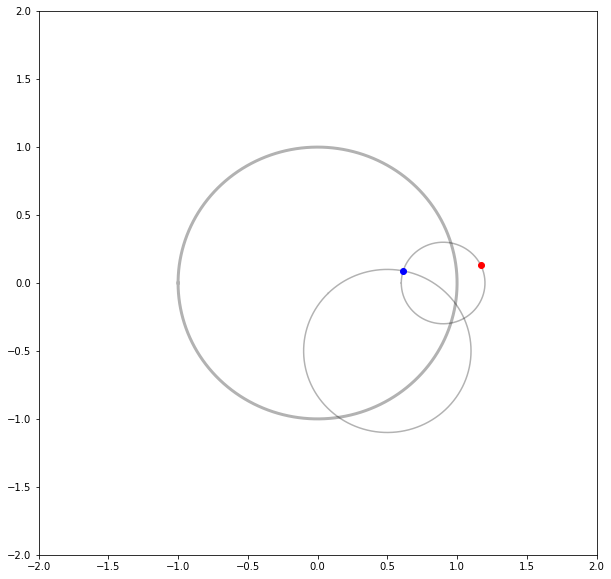

In [434]:
fig, axs = plt.subplots(figsize=(10, 10))
draw_circle(0, 0, 1, axs, color='k', alpha=0.3, linewidth=3)
draw_circle(xp, yp, rp, axs, color='k', alpha=0.3)
draw_circle(xm, ym, rm, axs, color='k', alpha=0.3)

#axs.plot(xm + rm * np.cos(phi), ym + rm * np.sin(phi), 'k.')
#draw_line(0, 0, phi, axs)
axs.plot(xm + rm * np.cos(np.pi + phi2), ym + rm * np.sin(np.pi + phi2), 'ro')
axs.plot(xm + rm * np.cos(np.pi - phi1), ym + rm * np.sin(np.pi - phi1), 'bo')

In [381]:
xp, yp, rp = 0.9, 0.0, 0.6
xm, ym, rm = 0.9, 0.7, 0.3

bm = np.sqrt(xm**2 + ym**2)
bp = np.sqrt(xp**2 + yp**2)
bmp = np.sqrt((xm-xp)**2 + (ym-yp)**2)
phi = phi_planet(rm, rp, bmp)
phistar = phi_star(rp, bp)

1.4127315468826522


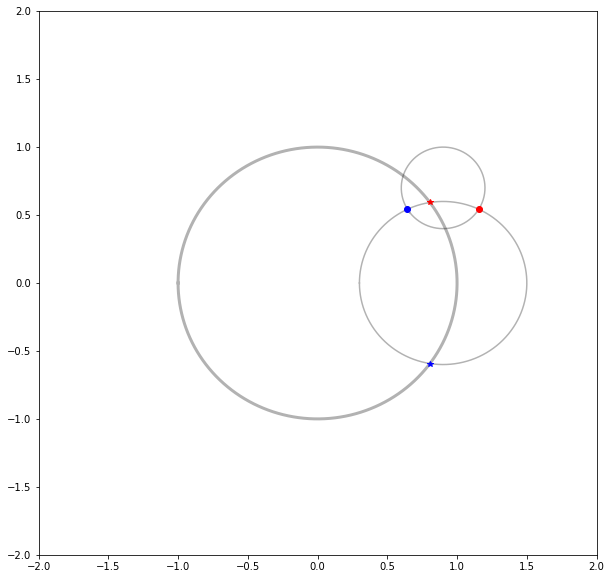

In [382]:
fig, axs = plt.subplots(figsize=(10, 10))
draw_circle(0, 0, 1, axs, color='k', alpha=0.3, linewidth=3)
draw_circle(xp, yp, rp, axs, color='k', alpha=0.3)
draw_circle(xm, ym, rm, axs, color='k', alpha=0.3)

theta = np.arctan2(ym-yp, xm-xp)

axs.plot(xp + rp * np.cos(theta-phi), yp + rp * np.sin(theta-phi), 'ro')
axs.plot(xp + rp * np.cos(theta+phi), yp + rp * np.sin(theta+phi), 'bo')

axs.plot(xp + rp * np.cos(np.pi-phistar), yp + rp * np.sin(np.pi-phistar), 'r*')
axs.plot(xp + rp * np.cos(np.pi+phistar), yp + rp * np.sin(np.pi+phistar), 'b*')

In [719]:
def configuration(xm, ym, rm, xp, yp, rp):
    
    bp2 = xp**2 + yp**2
    bm2 = xm**2 + ym**2
    bpm2 = (xp-xm)**2 + (yp-ym)**2
    bmp2 = bpm2
    bp = np.sqrt(bp2)
    bm = np.sqrt(bm2)
    bpm = np.sqrt(bpm2)
    bmp = bpm
        
    if bpm > rp + rm:
        if bp > rp + 1:
            if bm > rm + 1:
                print("neither planet nor moon overlap star")
            else:
                if bm + rm < 1:
                    print("moon completely overlaps star, planet is outside of star")
                else:
                    print("moon partially overlaps star, planet is outside of star")
        else:
            if bm > rm + 1:
                if bp + rp < 1:
                    print("planet completely overlaps star, moon is outside of star")
                else:
                    print("planet partially overlaps star, moon is outside of star")
            else:
                if bp + rp < 1:
                    if bm + rm < 1:
                        print("moon and planet both completely overlap star, they do not overlap each other")
                    else:
                        print("planet completely overlaps star, moon partially overlaps star, they do not overlap each other")
                else:
                    if bm + rm < 1:
                        print("planet partially overlaps star, moon fully overlaps star, they do not overlap each other")
                    else:
                        print("moon and planet both partially overlap star, but not each other")
    else:
        if bp > rp + 1:
            if bm > rm + 1:
                print("neither moon nor planet overlap star")
            else:
                if bm + rm < 1:
                    print("moon fully overlaps star, planet does not overlap star")
                else:
                    print("moon partially overlaps star, planet does not overlap star")
        else:
            if bm > rm + 1:
                if bp + rp < 1:
                    print("planet fully overlaps star, moon does not overlap star")
                else:
                    print("planet partially overlaps star, moon does not overlap star")
            else:
                if bp + rp < 1:
                    if bm + rm < 1:
                        if bpm + rm < rp:
                            print("moon and planet both fully overlap star, moon fully overlaps planet")
                        else:
                            print("moon and planet both fully overlap star and partially overlap each other")
                    else:
                        if bpm + rm < rp:
                            print("planet fully overlaps star, moon partially overlaps star, moon fully overlaps planet")
                        else:
                            print("planet fully overlaps star, moon partially overlaps star, planet and moon partially overlap each other")
                else:
                    if bm + rm < 1:
                        if bpm + rm < rp:
                            print("planet partially overlaps star, moon fully overlaps star, moon fully overlaps planet")
                        else:
                            print("planet partially overlaps star, moon fully overlaps star, planet and moon partially overlap each other")
                    else:
                        if bpm + rm < rp:
                            print("planet and moon both partially overlap star, moon fully overlaps planet")
                        else:
                            # this one has all the special cases 
                            
                            costhetapm = (bp2 + bm2 - bpm2) / (2 * bp * bm)
                            cosphim = (bm2 + 1 - rm**2) / (2 * bm)
                            cosphip = (bp2 + 1 - rp**2) / (2 * bp)
                            if np.arccos(costhetapm) + np.arccos(cosphim) < np.arccos(cosphip):
                                print("planet and moon both partially overlap star and each other, but moon/star overlap is entirely overlapped by planet/star overlap")
                            elif np.arccos(costhetapm) + np.arccos(cosphip) < np.arccos(cosphim):
                                print("planet and moon both partially overlap star and each other, but planet/star overlap is entirely overlapped by moon/star overlap.")
                            else:
                                costheta = (bmp2 + bm2 - bp2) / (2 * bmp * bm)
                                cosphim = (bmp2 + rm**2 - rp**2) / (2 * bmp * rm)
                                cosphi1 = np.cos(np.arccos(costheta) - np.arccos(cosphim))
                                cosphi2 = np.cos(np.arccos(costheta) + np.arccos(cosphim))
                                d1 = rm**2 + bm2 - 2 * rm * bm * cosphi1
                                d2 = rm**2 + bm2 - 2 * rm * bm * cosphi2
                                if d1 > 1:
                                    print("planet and moon both partially overlap star and each other, but the planet/moon overlap does not overlap the star.")
                                elif d2 < 1:
                                    print("planet and moon both partially overlap star and each other, with the planet/moon overlap fully overlapping the star.") 
                                else:
                                    print("planet and moon both partially overlap star and each other, with the planet/moon overlap partially overlapping the star.")

planet and moon both partially overlap star and each other, with the planet/moon overlap partially overlapping the star.


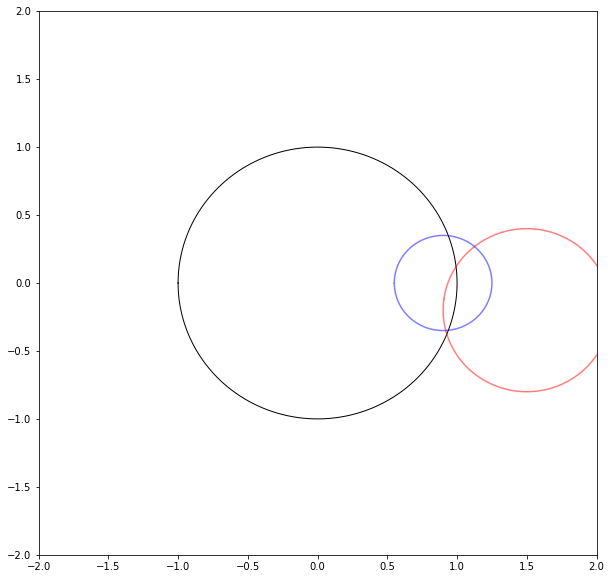

In [729]:
#xp, yp, rp = np.random.rand(1) * 2 - 1, np.random.rand(1) * 2 - 1, np.random.rand(1) 
#xm, ym, rm = np.random.rand(1) * 2 - 1, np.random.rand(1) * 2 - 1, np.random.rand(1) * rp

xp, yp, rp = 1.5, -0.2, 0.6
xm, ym, rm = 0.9, 0, 0.35

fig, axs = plt.subplots(figsize=(10, 10))
draw_circle(0, 0, 1, axs, color='k', alpha=1, linewidth=1)
draw_circle(xp, yp, rp, axs, color='r', alpha=0.5)
draw_circle(xm, ym, rm, axs, color='b', alpha=0.5)
configuration(xm, ym, rm, xp, yp, rp)
#axs.set_xlim(0.5, 1.5)
#axs.set_ylim(-0.5, 0.5)

In [585]:
args1 = np.random.rand(100)
args2 = np.random.rand(100)
%timeit np.cos(np.arccos(args1) - np.arccos(args2))

5.2 µs ± 34.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [586]:
args = np.random.rand(100)
args = np.random.rand(100)
%timeit args1*args2 - np.sqrt(1 - args1**2)*np.sqrt(1 - args2**2)

8.94 µs ± 2.09 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
